# Лабораторная работа №1
## Задание:

Найти или создать самостоятельно звуковой файл длительностью 10-15 секунд

Используя необходимые библиотеки провести базовый анализ сигнала:
1. Вывести график сигнала в амплитудно-временной форме
2. Используя преобразование Фурье отрисовать частотный спектр
3. Отрисовать спектрограмму сигнала
4. Вывести параметры файла: значение темпа, количество бит, частоту дискретизации и т.п.

Привести развернутый ответ на теоретический вопрос – что такое гармоническая и перкуссионная часть сигнала, для чего они нужны.

## Программа:

ПАРАМЕТРЫ ФАЙЛА
Частота дискретизации: 44100 Гц
Длительность: 15.07 сек
Тип данных: float64
Количество отсчётов: 664704


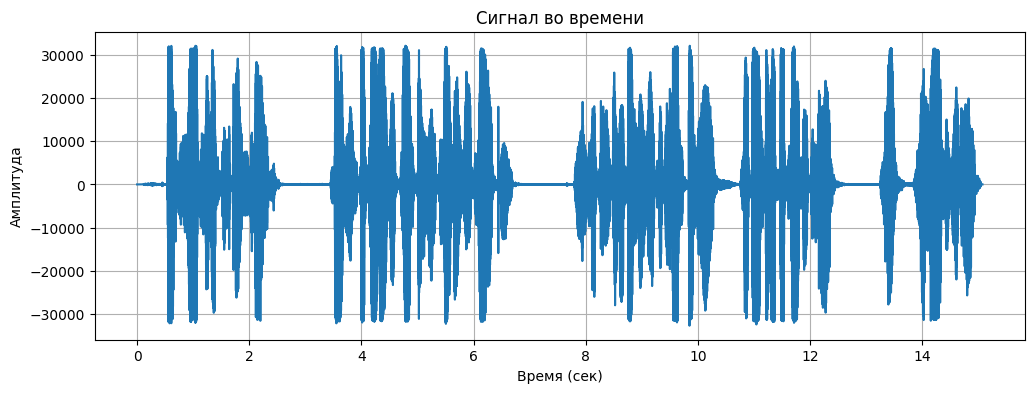

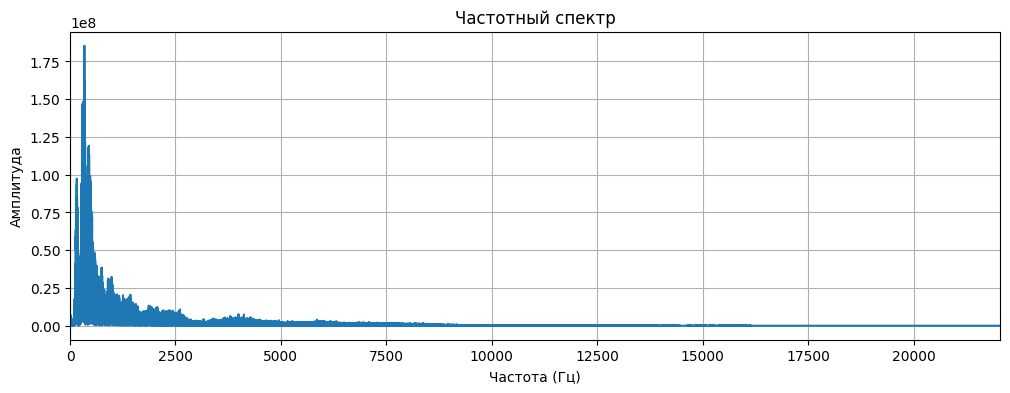

/tmp/ipython-input-1918423031.py:43: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10*np.log10(Sxx))


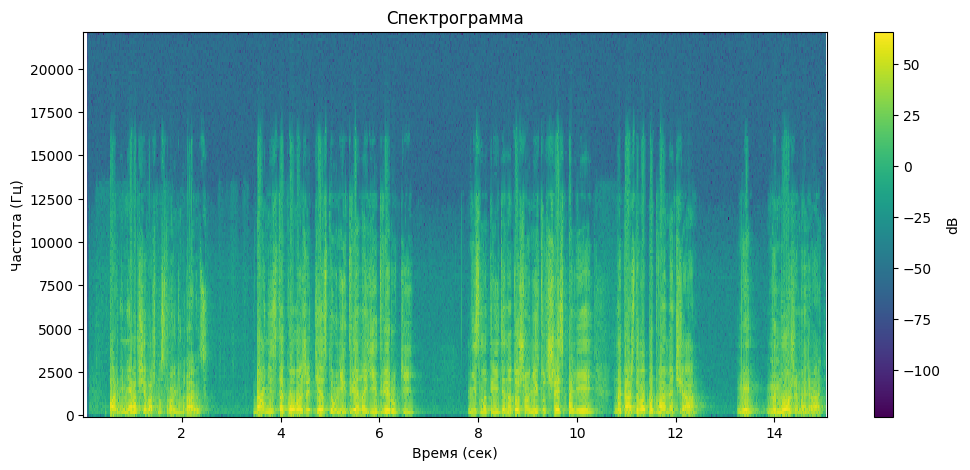

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import rfft, rfftfreq
from scipy.signal import spectrogram

audio_path = "what.wav"
sr, signal = wavfile.read(audio_path)
if len(signal.shape) == 2:
    signal = signal.mean(axis=1)

duration = len(signal) / sr

print("ПАРАМЕТРЫ ФАЙЛА")
print("Частота дискретизации:", sr, "Гц")
print("Длительность:", round(duration, 2), "сек")
print("Тип данных:", signal.dtype)
print("Количество отсчётов:", len(signal))
time = np.linspace(0, duration, len(signal))
plt.figure(figsize=(12,4))
plt.plot(time, signal)
plt.title("Сигнал во времени")
plt.xlabel("Время (сек)")
plt.ylabel("Амплитуда")
plt.grid()
plt.show()

# FFT
yf = np.abs(rfft(signal))
xf = rfftfreq(len(signal), 1/sr)
plt.figure(figsize=(12,4))
plt.plot(xf, yf)
plt.title("Частотный спектр")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.xlim(0, sr/2)
plt.grid()
plt.show()

# Спектрограмма
f, t, Sxx = spectrogram(signal, sr)
plt.figure(figsize=(12,5))
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel("Частота (Гц)")
plt.xlabel("Время (сек)")
plt.title("Спектрограмма")
plt.colorbar(label="dB")
plt.show()


## Ответ на теоретический вопрос:

Гармоническая часть сигнала — это составляющая звука, содержащая устойчивые, периодические колебания. Она формирует высоту тона и музыкальную ноту. Обычно связана с вокалом, мелодией и инструментами с выраженной тональностью.


Перкуссионная часть сигнала — это кратковременные, импульсные компоненты звука. Они отвечают за ритм и атаки звука: удары барабана, щелчки, резкие переходы.

